<a href="https://colab.research.google.com/github/dunkelweizen/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Cai_Nowicki_Data_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exoplanet Data Visualization

I started with CalTech's dataset on confirmed exoplanets. Initial project goal: create a visualization showing relative sizes and distances of a selection of exoplanets as compared to Earth, our Solar System, and the Sun. 

I could also create a visualization showing how many confirmed exoplanets are larger/smaller than Jupiter, and how many stars with exoplanets are larger/smaller, hotter/cooler than our Sun, how many exoplanets are denser/less dense than Earth, etc. Or compare their "years" to Earth years, and maybe even crosstab that with relative sizes of stellar object and exoplanet. (Does the size of the star or the size of the planet correlate to orbital times?)

##Exoplanet Data Collection

In [2]:
#explanation of how to get this file and format the API request https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html=
#this query used table=exoplanets (exoplanet data), select=default (default columns), format=csv 
!wget "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?&table=exoplanets&select=defaults&format=csv" -O "confirmed_exoplanets.csv"

--2019-09-14 01:50:29--  https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?&table=exoplanets&select=defaults&format=csv
Resolving exoplanetarchive.ipac.caltech.edu (exoplanetarchive.ipac.caltech.edu)... 134.4.54.151
Connecting to exoplanetarchive.ipac.caltech.edu (exoplanetarchive.ipac.caltech.edu)|134.4.54.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘confirmed_exoplanets.csv’

confirmed_exoplanet     [    <=>             ]   1.44M  1.41MB/s    in 1.0s    

2019-09-14 01:50:31 (1.41 MB/s) - ‘confirmed_exoplanets.csv’ saved [1514253]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('confirmed_exoplanets.csv')

In [5]:
df.head()

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,...,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility
0,Kepler-150,d,Kepler-150 d,Transit,0,5,12.560930,0.000036,-0.000036,0.0,4,0.104,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.249,0.037,-0.037,0.0,3,NaN,NaN,NaN,...,0,1,0,19h12m56.18s,+40d31m15.3s,288.234084,0.000019,40.520905,0.000017,2,914.40,17.46,-17.46,0.0,3,14.985,NaN,0.0,Kepler-band,14.974,NaN,0.0,5560.0,100.0,-100.0,0.0,6,NaN,NaN,NaN,NaN,1,0.94,0.14,-0.14,0.0,6,1,2014-05-14,Kepler
1,Kepler-150,e,Kepler-150 e,Transit,0,5,30.826557,0.000199,-0.000199,0.0,4,0.189,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.278,0.049,-0.049,0.0,3,NaN,NaN,NaN,...,0,1,0,19h12m56.18s,+40d31m15.3s,288.234084,0.000019,40.520905,0.000017,2,914.40,17.46,-17.46,0.0,3,14.985,NaN,0.0,Kepler-band,14.974,NaN,0.0,5560.0,100.0,-100.0,0.0,6,NaN,NaN,NaN,NaN,1,0.94,0.14,-0.14,0.0,6,1,2014-05-14,Kepler
2,Kepler-151,b,Kepler-151 b,Transit,0,2,15.228958,0.000030,-0.000030,0.0,4,0.116,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.273,0.136,-0.136,0.0,3,NaN,NaN,NaN,...,0,1,0,19h28m39.07s,+41d01m23.6s,292.162778,0.000017,41.023235,0.000017,2,662.19,9.82,-9.82,0.0,3,14.769,NaN,0.0,Kepler-band,14.719,NaN,0.0,5460.0,200.0,-200.0,0.0,6,NaN,NaN,NaN,NaN,2,0.83,0.41,-0.41,0.0,6,1,2014-05-14,Kepler
3,Kepler-151,c,Kepler-151 c,Transit,0,2,24.674612,0.000106,-0.000106,0.0,4,0.160,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.186,0.093,-0.093,0.0,3,NaN,NaN,NaN,...,0,1,0,19h28m39.07s,+41d01m23.6s,292.162778,0.000017,41.023235,0.000017,2,662.19,9.82,-9.82,0.0,3,14.769,NaN,0.0,Kepler-band,14.719,NaN,0.0,5460.0,200.0,-200.0,0.0,6,NaN,NaN,NaN,NaN,2,0.83,0.41,-0.41,0.0,6,1,2014-05-14,Kepler
4,Kepler-152,b,Kepler-152 b,Transit,0,2,18.207973,0.000023,-0.000023,0.0,4,0.124,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.249,0.015,-0.015,0.0,3,NaN,NaN,NaN,...,0,1,0,19h07m27.71s,+41d59m20.7s,286.865479,0.000022,41.989086,0.000017,2,446.77,3.19,-3.19,0.0,3,14.290,NaN,0.0,Kepler-band,14.244,NaN,0.0,5088.0,100.0,-100.0,0.0,6,NaN,NaN,NaN,NaN,1,0.72,0.04,-0.04,0.0,6,1,2014-05-14,Kepler


In [6]:
df['pl_bmassj'].sample(10)

2806       NaN
2808       NaN
3359       NaN
877      0.560
2386       NaN
727     15.040
2524       NaN
3703     0.223
906        NaN
485        NaN
Name: pl_bmassj, dtype: float64

In [0]:
#let's do something about those awful column headers and the size of that
#if I don't understand what a column means I'm not going to be able to visualize, so just skip those
#column name definitions from https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html#defaultcol
df_exo = pd.DataFrame()
df_exo['Host Star'] = df['pl_hostname']
df_exo['System Distance (Parsecs)'] = df['st_dist']
df_exo['Stellar Mass (solar masses)'] = df['st_mass']
df_exo['Stellar Radius (solar radii)'] = df['st_rad']
df_exo['Stellar Effective Temp (K)'] = df['st_teff']
df_exo['Planet Name'] = df['pl_name']
df_exo['Discovery Type'] = df['pl_discmethod']
df_exo['Planets in System'] = df['pl_pnum']
df_exo['Orbital Period (days)'] = df['pl_orbper']
df_exo['Mass (J-masses)'] = df['pl_bmassj']
df_exo['Planet Radius (J-radii)'] = df['pl_radj']
df_exo['Planet Density'] = df['pl_dens']

In [8]:
df_exo.sample(10)   #much better!

,Host Star,System Distance (Parsecs),Stellar Mass (solar masses),Stellar Radius (solar radii),Stellar Effective Temp (K),Planet Name,Discovery Type,Planets in System,Orbital Period (days),Mass (J-masses),Planet Radius (J-radii),Planet Density
2153,Kepler-484,377.00,0.96,0.87,5668.0,Kepler-484 b,Transit,1,10.045569,NaN,0.203,NaN
1344,HD 30669,57.10,0.92,0.91,5400.0,HD 30669 b,Radial Velocity,1,1684.000000,0.4700,NaN,NaN
2259,Kepler-1016,1239.00,0.99,1.00,5821.0,Kepler-1016 c,Transit,2,105.655137,NaN,0.328,NaN
484,Kepler-937,1482.00,1.15,1.22,6095.0,Kepler-937 c,Transit,2,153.343364,NaN,0.238,NaN
2842,K2-137,99.15,0.46,0.44,3492.0,K2-137 b,Transit,1,0.179715,0.5000,0.079,NaN
3319,Kepler-347,1349.45,NaN,1.00,6088.0,Kepler-347 c,Transit,2,27.320871,NaN,0.156,NaN
2204,Kepler-1016,1239.00,0.99,1.00,5821.0,Kepler-1016 b,Transit,2,1.954524,NaN,0.194,NaN
1585,Kepler-241,609.86,NaN,0.67,4699.0,Kepler-241 b,Transit,2,12.718092,NaN,0.208,NaN
3381,HATS-11,967.34,1.33,1.54,6563.0,HATS-11 b,Transit,1,3.619188,NaN,1.609,NaN
3799,HD 136352,14.81,0.81,NaN,5664.0,HD 136352 b,Radial Velocity,3,11.582400,0.0151,NaN,NaN


##Local System Data Collection
If I'm going to compare to Earth and our system, I need to have the same info for our Sun and Earth as I do for the exoplanets

* Host Star = Sun  (apparently there's no official designation! source = https://www.universetoday.com/18701/name-of-the-sun/)
* System Distance = 0 AU (we are 0 AU from ourselves!)
* Stellar Mass = 1 (by definition)
* Stellar Radius = 1 (by definition)
* Stellar Effective Temp = 5777 K  (source = https://en.wikipedia.org/wiki/Effective_temperature#/media/File:EffectiveTemperature_300dpi_e.png)
* Planet Name = Earth (again, that's the official designation source = https://www.iau.org/public/themes/naming/#majorplanetsandmoon)
* Discovery Type = None
* Planets in System = 8
* Orbital Period = 365.26  (source = https://pds.jpl.nasa.gov/planets/special/earth.htm)
* Mass (J-masses) = 0.003 (source = https://en.wikipedia.org/wiki/Jupiter_mass#Relative_mass)
* Planet Radius (J-radii) = 0.08921 (source = https://en.wikipedia.org/wiki/Jupiter_radius)
* Planet Density = 5.52 g/cm^3 (source = https://pds.jpl.nasa.gov/planets/special/earth.htm )



In [9]:
earth = ['Sun', 0, 1, 1, 5777, 'Earth', 'None', 8, 365.26, 0.003, 0.08921, 5.52]
df_exo.loc[len(df_exo)] = earth
df_exo.tail()

,Host Star,System Distance (Parsecs),Stellar Mass (solar masses),Stellar Radius (solar radii),Stellar Effective Temp (K),Planet Name,Discovery Type,Planets in System,Orbital Period (days),Mass (J-masses),Planet Radius (J-radii),Planet Density
4051,OGLE-2018-BLG-0596L,5650.00,0.23,NaN,NaN,OGLE-2018-BLG-0596L b,Microlensing,1,NaN,0.04383,NaN,NaN
4052,Kepler-82,927.97,0.91,0.90,NaN,Kepler-82 f,Transit Timing Variations,5,75.732000,0.06576,NaN,NaN
4053,NGTS-5,309.50,0.66,0.74,4987.0,NGTS-5 b,Transit,1,3.356987,0.22900,1.13600,NaN
4054,HD 210193,42.25,1.04,NaN,5790.0,HD 210193 b,Radial Velocity,1,649.918000,0.48170,NaN,NaN
4055,Sun,0.00,1.00,1.00,5777.0,Earth,None,8,365.260000,0.00300,0.08921,5.52


In [10]:
#might also be useful to have a dataframe of just Earth
df_earth = pd.DataFrame(columns=df_exo.columns)
df_earth.loc[0] = earth
df_earth

,Host Star,System Distance (Parsecs),Stellar Mass (solar masses),Stellar Radius (solar radii),Stellar Effective Temp (K),Planet Name,Discovery Type,Planets in System,Orbital Period (days),Mass (J-masses),Planet Radius (J-radii),Planet Density
0,Sun,0,1,1,5777,Earth,None,8,365.26,0.003,0.08921,5.52


##Visualizing the Data

###Averages Bar Plot

Let's start simple. I'll compare the mean values for numerical columns with Earth and the Sun.

In [11]:
df_exo.describe().T   #this shows me all the numerical data columns


,count,mean,std,min,25%,50%,75%,max
System Distance (Parsecs),4050.0,637.145200,826.601712,0.000000,158.390000,481.000000,867.000000,8500.00
Stellar Mass (solar masses),3291.0,1.005220,0.652106,0.010000,0.810000,0.970000,1.130000,23.56
Stellar Radius (solar radii),3717.0,1.543688,3.714217,0.010000,0.800000,0.970000,1.260000,71.23
Stellar Effective Temp (K),3838.0,5495.682837,1763.098549,575.000000,5027.000000,5600.000000,5923.000000,57000.00
Planets in System,4056.0,1.776874,1.164314,1.000000,1.000000,1.000000,2.000000,8.00
Orbital Period (days),3942.0,2315.356129,116642.605903,0.090706,4.489907,11.870525,42.273305,7300000.00
Mass (J-masses),1614.0,2.514948,4.425381,0.000060,0.089872,0.861500,2.540000,55.59
Planet Radius (J-radii),3143.0,0.375108,0.426963,0.030000,0.140000,0.208000,0.319000,6.90
Planet Density,481.0,2.562815,5.211017,0.030000,0.411000,0.994000,2.600000,77.70


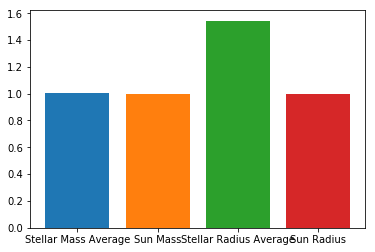

In [12]:
plt.bar(x='Stellar Mass Average', height = df_exo['Stellar Mass (solar masses)'].mean())
plt.bar(x='Sun Mass', height = 1.000)

plt.bar(x='Stellar Radius Average', height = df_exo['Stellar Radius (solar radii)'].mean())
plt.bar(x='Sun Radius', height = 1.000)

plt.show()

In [0]:
#I can make that look better
import seaborn as sns
#come back to this later

###Orbital Times Bar Plot

In [76]:
idmin = df_exo[['Orbital Period (days)']].idxmin()
df_exo.iloc[3480]

Host Star                         PSR J1719-1438
System Distance (Parsecs)                   1200
Stellar Mass (solar masses)                  1.4
Stellar Radius (solar radii)                0.04
Stellar Effective Temp (K)                  4500
Planet Name                     PSR J1719-1438 b
Discovery Type                     Pulsar Timing
Planets in System                              1
Orbital Period (days)                  0.0907063
Mass (J-masses)                              1.2
Planet Radius (J-radii)                      NaN
Planet Density                                23
Name: 3480, dtype: object

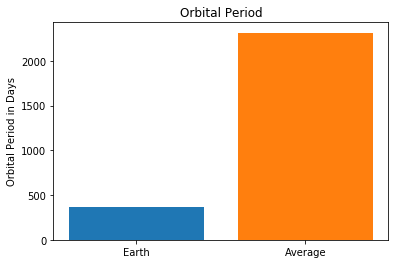

In [80]:
plt.title('Orbital Period')
plt.ylabel('Orbital Period in Days')
plt.bar(x='Earth', height = df_earth['Orbital Period (days)'].loc[0])   #Earth's orbital period
plt.bar(x='Average', height=df_exo['Orbital Period (days)'].mean())     #Average orbital period
#plt.bar(x=('Longest Orbital Period' + df_exo['Planet Name'].iloc[df_exo[['Orbital Period (days)']].idxmax()]),
        #height = df_exo['Orbital Period (days)'].iloc[df_exo[['Orbital Period (days)']].idxmax()])
#plt.bar(x=('Shortest Orbital Period' + df_exo['Planet Name'].iloc[df_exo[['Orbital Period (days)']].idxmin()]),
        #height = df_exo['Orbital Period (days)'].iloc[df_exo[['Orbital Period (days)']].idxmin()])
#it works but that is ugly code! And anyway the resulting graph isn't readable
plt.show()

###Circle patches
I can use plt.patches.Circle to create a circle of a specific radius at a specific x,y coordinate pair. I could use the AU distance column as an X value and the J-radius column as the circle radius. Could use this to show the smallest exoplanet w/ distance, largest exoplanet w/ distance, Earth, and average size/average distance

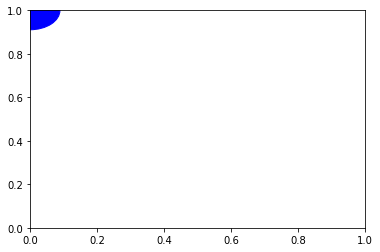

In [15]:
earth_cir = plt.Circle(xy=(0,1), radius=df_earth['Planet Radius (J-radii)'].iloc[0], color='blue')
fig, ax = plt.subplots()
ax.add_artist(earth_cir)
plt.show()   #this shows the circle for Earth with AU = 0 and radius = Earth's J-radius

In [0]:
earth_radius = df_earth['Planet Radius (J-radii)'].iloc[0]

In [17]:
df_exo_sorted1 = df_exo.sort_values(by='Planet Radius (J-radii)', ascending=True)
df_exo_sorted1 = df_exo_sorted1.reset_index()
df_exo_sorted1.head()

,index,Host Star,System Distance (Parsecs),Stellar Mass (solar masses),Stellar Radius (solar radii),Stellar Effective Temp (K),Planet Name,Discovery Type,Planets in System,Orbital Period (days),Mass (J-masses),Planet Radius (J-radii),Planet Density
0,1307,Kepler-37,64.04,0.87,0.79,5417.0,Kepler-37 b,Transit,4,13.367310,0.01000,0.030,NaN
1,3204,Kepler-444,36.48,0.76,0.75,5046.0,Kepler-444 b,Transit,5,3.600105,NaN,0.036,NaN
2,971,Kepler-102,108.13,0.81,0.76,4909.0,Kepler-102 b,Transit,5,5.286960,0.01353,0.042,NaN
3,3205,Kepler-444,36.48,0.76,0.75,5046.0,Kepler-444 c,Transit,5,4.545884,NaN,0.044,NaN
4,540,Kepler-1308,73.00,0.35,0.34,3468.0,Kepler-1308 b,Transit,1,2.104338,NaN,0.046,NaN


In [33]:
sm_radius = df_exo_sorted1.loc[0, 'Planet Radius (J-radii)']
sm_distance = df_exo_sorted1.loc[0, 'System Distance (Parsecs)']
sm_planet = df_exo_sorted1.loc[0, 'Planet Name']
print(sm_radius, sm_distance)

0.03 64.04


In [19]:
df_exo_sorted2 = df_exo.sort_values(by='Planet Radius (J-radii)', ascending=False)
df_exo_sorted2 = df_exo_sorted2.reset_index()
df_exo_sorted2.head()

,index,Host Star,System Distance (Parsecs),Stellar Mass (solar masses),Stellar Radius (solar radii),Stellar Effective Temp (K),Planet Name,Discovery Type,Planets in System,Orbital Period (days),Mass (J-masses),Planet Radius (J-radii),Planet Density
0,924,HD 100546,110.02,2.40,NaN,10500.0,HD 100546 b,Imaging,1,NaN,NaN,6.900,NaN
1,175,HAT-P-35,514.20,23.56,3.82,6096.0,HAT-P-35 b,Transit,1,3.646710,7.52,3.550,NaN
2,1321,GQ Lup,151.82,0.70,NaN,NaN,GQ Lup b,Imaging,1,NaN,20.00,3.000,NaN
3,1263,CT Cha,165.00,NaN,NaN,NaN,CT Cha b,Imaging,1,NaN,17.00,2.200,NaN
4,2861,HAT-P-67,320.00,1.64,2.55,6406.0,HAT-P-67 b,Transit,1,4.810103,0.34,2.085,0.052


In [32]:
lg_radius = df_exo_sorted2.loc[0, 'Planet Radius (J-radii)']
lg_distance = df_exo_sorted2.loc[0, 'System Distance (Parsecs)']
lg_planet = df_exo_sorted2.loc[0, 'Planet Name']
print(lg_radius, lg_distance)

6.9 110.02


In [21]:
print(earth_radius)

0.08921


In [0]:
lg_rad_scaled = lg_radius / 100
lg_dist_scaled = lg_distance / 100
sm_rad_scaled = sm_radius / 100
sm_dist_scaled = sm_distance / 100
e_rad_scaled = earth_radius / 100

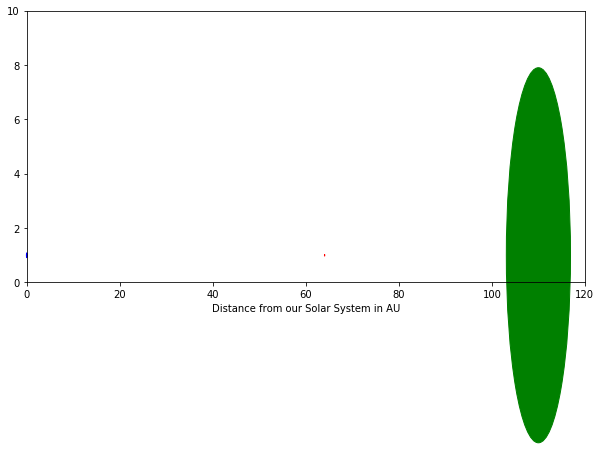

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))    #sets the size of the graph
ax.set_xlim(0, 120)   #sets the x and y axis lengths
ax.set_ylim(0, 10)


earth_cir = plt.Circle(xy=(0,1), radius=earth_radius, color='blue', clip_on=False)
#creates a circle of 'radius' at x,y
sm_cir = plt.Circle(xy = (sm_distance, 1), radius=sm_radius, color = 'red', clip_on=False)
lg_cir = plt.Circle(xy = (lg_distance, 1), radius=lg_radius, color = 'green', clip_on=False)

ax.add_artist(earth_cir)
ax.add_artist(sm_cir)
ax.add_artist(lg_cir)

plt.xlabel('Distance from our Solar System in AU')
fig.savefig('plotradius.png')

#this works but it's not very readable, although it does nicely illustrate the massive difference in size

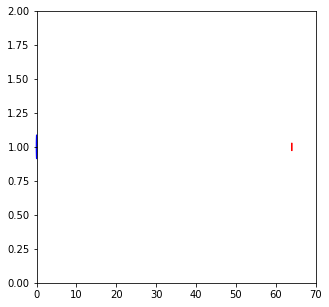

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(0, 70)
ax.set_ylim(0, 2)
earth_cir = plt.Circle(xy=(0,1), radius=earth_radius, color='blue', clip_on=False)
sm_cir = plt.Circle(xy = (sm_distance, 1), radius=sm_radius, color = 'red', clip_on=False)
ax.add_artist(earth_cir)
ax.add_artist(sm_cir)

fig.savefig('plotradius2.png')

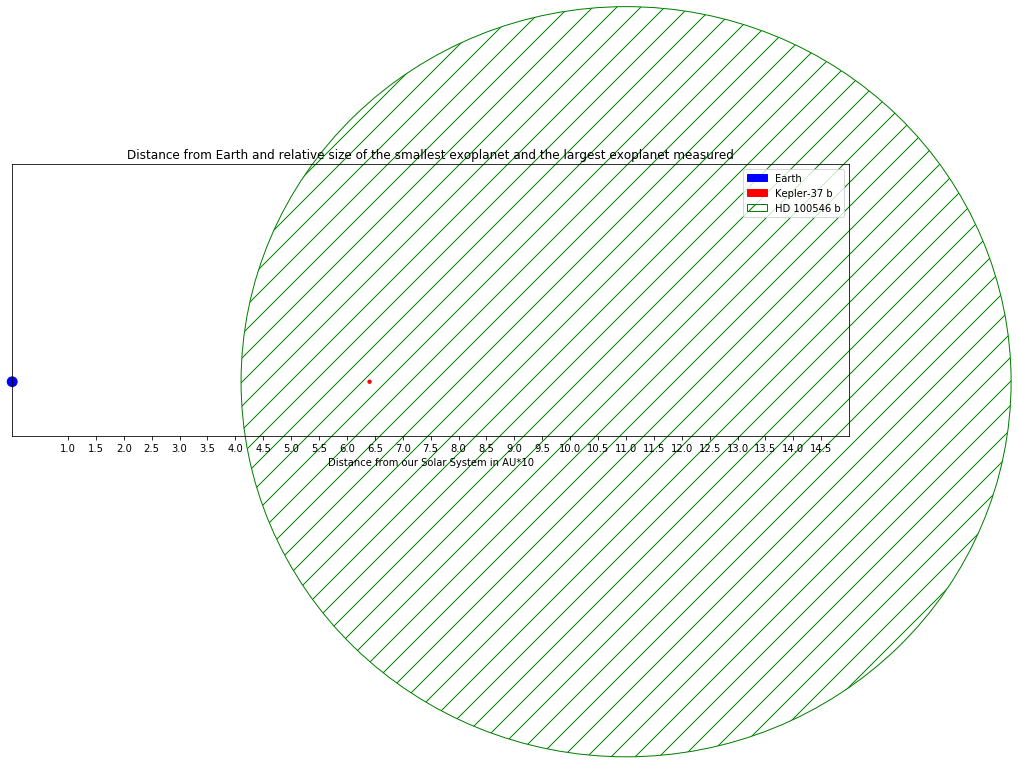

In [70]:
#I guess x doesn't actually need to be AU...it would just be cool. probably more readable with smaller units for x. 
#maybe I should reduce distance by 10

fig, ax = plt.subplots(figsize=(15,5))    #sets the size of the graph
ax.set_xlim(0, 15)   #sets the x and y axis lengths
ax.set_ylim(0, 5)


earth_cir = plt.Circle(xy=(0,1), radius=earth_radius, color='blue', clip_on=False, 
                       label='Earth')
#creates a circle of 'radius' at x,y
sm_cir = plt.Circle(xy = ((sm_distance / 10), 1), radius=sm_radius, color = 'red', 
                    clip_on=False, label=sm_planet)
lg_cir = plt.Circle(xy = ((lg_distance / 10), 1), radius=lg_radius, color = 'green', 
                    clip_on=False, fill=False, label=lg_planet, hatch='/')
#making the largest circle open improves readability


ax.add_artist(earth_cir)
ax.add_artist(sm_cir)
ax.add_artist(lg_cir)

plt.xticks(np.arange(1,15, 0.5))
plt.xlabel('Distance from our Solar System in AU*10')
plt.title('Distance from Earth and relative size of the smallest exoplanet and the largest exoplanet measured')

   
ax.legend((earth_cir, sm_cir, lg_cir), ('Earth', sm_planet, lg_planet))
fig.savefig('plotradius3.png')
plt.gca().axes.get_yaxis().set_visible(False)  #turning off the numbers/tickmarks on the y-axis since they don't mean much here
plt.show()

So the center of the circle is located at the distance of that planet from Earth's Solar System in AU, while the size of the circle represents the relative radii of the planets.

Need to figure out how to find the index of the planet closest to the median planet radius and add that too! 

##Crosstabulation of Orbital Time with Planet Size and Stellar Size